In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [4]:
tf.version.VERSION

'2.1.0'

In [199]:
true_w = 5
true_b = 3
num_features = 200

X = tf.random.normal(shape=[num_features])
noise = tf.random.uniform(shape=[num_features],minval=-4, maxval=4)
y = true_w*X + true_b + noise

X.shape , y.shape

(TensorShape([200]), TensorShape([200]))

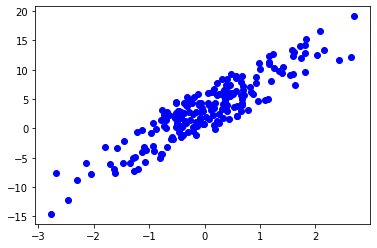

In [200]:
plt.scatter(X,y , c='b')
plt.show()

In [0]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.W = tf.Variable(tf.random.uniform(shape=[num_features],minval=0.0,maxval=10),name = "Weights")
    self.b = tf.Variable(tf.zeros(shape=[num_features]),name = "Bias")

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

# tf.random.uniform


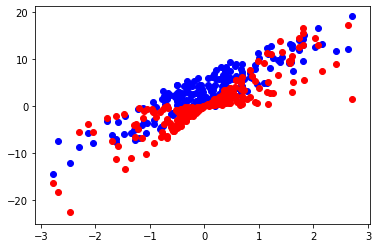

In [203]:
plt.scatter(X, y, c='b')
plt.scatter(X, model(X), c='r')
plt.show()

In [0]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [0]:
#hyperparameters of the model, the Learning Rate and the number of Epochs.
learning_rate = 0.01
training_epochs = 1000


In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

In [261]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs_plot = list()
loss_plot = list()
epochs = range(1000)
for epoch in epochs:
  Ws.append(model.W.numpy().mean())
  bs.append(model.b.numpy().mean())
  current_loss = loss(model(X), y)

  train(model, X, y, learning_rate=0.2)

  if (epoch + 1) % 50 == 0:
    Ws.append(model.W.numpy().mean())
    bs.append(model.b.numpy().mean())
    epochs_plot.append( epoch + 10 )
    loss_plot.append( current_loss ) 
    print('Epoch %2d:  loss=%2.5f' %
        (epoch, current_loss))
  


Epoch 49:  loss=15.38850
Epoch 99:  loss=10.47572
Epoch 149:  loss=7.54270
Epoch 199:  loss=5.60199
Epoch 249:  loss=4.23809
Epoch 299:  loss=3.24452
Epoch 349:  loss=2.50426
Epoch 399:  loss=1.94448
Epoch 449:  loss=1.51675
Epoch 499:  loss=1.18742
Epoch 549:  loss=0.93237
Epoch 599:  loss=0.73394
Epoch 649:  loss=0.57898
Epoch 699:  loss=0.45759
Epoch 749:  loss=0.36223
Epoch 799:  loss=0.28717
Epoch 849:  loss=0.22795
Epoch 899:  loss=0.18116
Epoch 949:  loss=0.14413
Epoch 999:  loss=0.11478


Introduce Batch Size into the Mix

In [313]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs_plot = list()
loss_plot = list()
batch_size = 10
epochs = range(200)
for epoch in epochs:
  Ws.append(model.W.numpy().mean())
  bs.append(model.b.numpy().mean())
  for batch in range( int(num_features/batch_size) ):
    
    current_loss = loss(model(X), y)

    train(model, X, y, learning_rate=0.1)
  
    
  if (epoch + 1) % 10 == 0:
    
    epochs_plot.append( epoch + 10 )
    loss_plot.append( current_loss ) 
    print('Epoch %2d:  loss=%2.5f' %
        (epoch, current_loss))


Epoch  9:  loss=9.41563
Epoch 19:  loss=5.14281
Epoch 29:  loss=3.00671
Epoch 39:  loss=1.81368
Epoch 49:  loss=1.11310
Epoch 59:  loss=0.69071
Epoch 69:  loss=0.43196
Epoch 79:  loss=0.27174
Epoch 89:  loss=0.17176
Epoch 99:  loss=0.10899
Epoch 109:  loss=0.06938
Epoch 119:  loss=0.04430
Epoch 129:  loss=0.02835
Epoch 139:  loss=0.01819
Epoch 149:  loss=0.01169
Epoch 159:  loss=0.00753
Epoch 169:  loss=0.00486
Epoch 179:  loss=0.00314
Epoch 189:  loss=0.00203
Epoch 199:  loss=0.00132


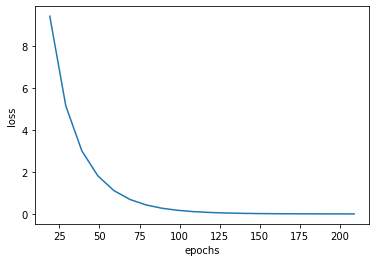

In [314]:
plt.plot( epochs_plot , loss_plot ) 
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
predictions = Ws * X + bs

In [271]:
predictions.shape

TensorShape([200])

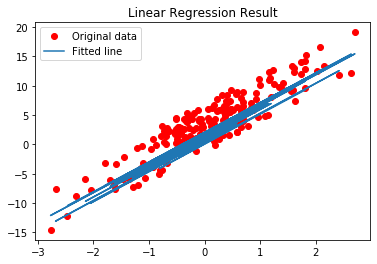

In [316]:
plt.plot(X, y, 'ro', label ='Original data') 
plt.plot(X, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 